# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 

## Model 

### Veri setimizde çeşitli sağlık olayları verilmiş ve sonundaki outcome ile şeker hatsalığına dair 1 evet 0 hayır şeklinde bilgilendirme verilmiş. Biz de bu veri setini kullanarak tahmin yapacağız.

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
#768 gözlem grubu ve 9 tane sayısal-sürekli değişkenleimiz var. Normalde outcome kategorik değişken evet hayır şeklinde ama bunu da 0-1 şeklinnde sayısala çevrilmiş
#biz burda sadece 1 olanlarla yani şeker hastalığı olanlarla ilgileneceğiz.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()
#bağımlı değişkeni inceliyoruz. kaç tane 0 kaç tane 1 var yani veri setindeki gözlemlerdeki şeker hastalığı sayısı

0    500
1    268
Name: Outcome, dtype: int64

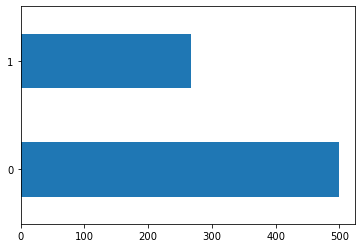

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1) #outcome y'ye atandı x de onun dışındaki her şey olarak atandı
#logistic regression oluşturacak şekilde değişkenlerimizi isimlendirdik

In [8]:
#statsmodels

In [9]:
loj = sm.Logit(y, X) #logit modelimizi kurduk
loj_model= loj.fit() #model kurma işlemi tamamlandı
loj_model.summary() #stats modelden sonuçları görüntüledik

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Mar 2021   Pseudo R-squ.:                 0.05922
Time:                        19:30:54   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Logistic regressionda, önceki doğrusal regresyon modellerinde yaptığımız gibi coef değerlerini değil onları tersine logistic olarak dönüştürüp kullanmamız gerekiyor. Doğrusal regresyonda direk coef değerlerine bakarak değerlendirme yapıyorduk.

In [10]:
#scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [12]:
loj_model.intercept_ #sabit değer

array([-5.83844272])

In [13]:
loj_model.coef_ #bağımsız değişkenlerin katsayı değerleri

array([[ 1.16929988e-01,  2.82449198e-02, -1.69681214e-02,
         7.65756063e-04, -6.30140306e-04,  5.91725245e-02,
         6.67861781e-01,  7.08237929e-03]])

## Tahmin & Model Tuning

### Karmaşıklık matrisi oluşturma ve accuracy skoruna erişme işlemi


In [34]:
y_pred = loj_model.predict(X)

In [35]:
confusion_matrix(y,y_pred)
#karmaşıklık matrisi oluşturduk. 442= gerçekte 1ken 1 olanlar 58=gerçekte 1ken 0 olanlar 117= =gerçekte 0ken 1 olanlar 151 =gerçekte 0ken 0 olanlar

array([[442,  58],
       [117, 151]])

In [36]:
accuracy_score(y, y_pred)

0.7721354166666666

#### logistic regresyoun diğer logaritmalar gibi dışsal hiper parametresi yok. optimize tyani tune edilebilecek bir değişken yok o yüzden model doğrulama işlemi yapmış olacağız
#### ele alınan bağımlı değişkenin ilgilendiğimiz sınıfın doğru sınıf olup olmadığını kontrol edip emin olmamız gerekmektedir. Sınıflandırma porblemlerinde sık karşılaşılan bir sorundur.
#### örneğin kanser olup olmamak konusunda olmak, kredi ödeyip ödeyemeyecek durumunda ödeyemeyecek olma durumu genelde bu seçenekler 1. sınıf olur. Bu yüzden bu sınıfların doğru atanıp atanmadığına dikkat etmemiz düzgün belirlememiz lazım. Yoksa baştan komple yanlış olur


In [17]:
print(classification_report(y, y_pred)) #detaylı sınıflandırma algoritmasının sonuçlarınıı değerlendirecek çıktılardan birisi

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [18]:
loj_model.predict(X)[0:10] #tahmin değerlerini verdi ancak direkt 1 ve sıfır olarak girdi kendi değer yargısına göre.

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [19]:
loj_model.predict_proba(X)[0:10][:,0:2] #burda ise tam değerlerini verdi biz burda kendimiz değer eşiği koyup ona göre değerlendirebiliriz.
#predict_proba bize 2 çıktılı bir değer üretir. 1.(sol) kısım 0 olma durumunu 2.(sağ) 1 olma durumunu ifade eder. Biz 1 sınıfıyla ilgilendiğimiz için sağ ile ilgilenecez
#örneğin 0. indexin değerleri 0.3521625 ve 0.6478375. Yani 0.3521625 ihtimalle 0, 0.6478375 ihtimalle 1. Kontrol ettiğimizde 0. indexin 1 olduğunu görüyoruz

array([[0.3521625 , 0.6478375 ],
       [0.91609395, 0.08390605],
       [0.22547916, 0.77452084],
       [0.92028465, 0.07971535],
       [0.17002552, 0.82997448],
       [0.79762156, 0.20237844],
       [0.87865807, 0.12134193],
       [0.27633883, 0.72366117],
       [0.32085593, 0.67914407],
       [0.92157454, 0.07842546]])

In [20]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [38]:
y_probs = loj_model.predict_proba(X) #model içindeki y prob(ihtimal) değerlerini aldık
y_probs = y_probs[:,1] #1lerle ilgileneceğimiz için 2. kolon yani 1.index değerini aldık

In [41]:
y_probs[0:10] #yukardaki değerle kontrol ettik

array([0.6495023 , 0.10276869, 0.69335223, 0.09566831, 0.74954459,
       0.21354089, 0.13632797, 0.68853074, 0.779661  , 0.08639127])

In [23]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] # kendimiz bir eşik değeri belirledik

In [24]:
y_pred[0:10] #görüldüğü üzere bazı değerler bizim belirlediğimiz değere göre değişti

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [25]:
confusion_matrix(y, y_pred) # kendi belirlediğimiz eşik değeri üzerinden tekrar bir karmaşıklı matrisi ve accuracy değeri hesaplıyoruz

array([[448,  52],
       [121, 147]])

In [26]:
accuracy_score(y, y_pred) #doğru yapılan işler bölü tüm olaylar manasına gelir.

0.7747395833333334

In [27]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



### accuracy yerine ROC eğrisi üzerinden değerlendirmek istersek aşağıdaki adımları izlememiz gerek. ROC eğrisinde ortadaki kısım rasgele 1-0 değerlerini atasak oluşacak çizgi ve bundan uzak olmaya çalışıyoruz.

In [28]:
loj_model.predict_proba(X)[:,1][0:5] #aşağıda inceleyeceğimiz kısım

array([0.6478375 , 0.08390605, 0.77452084, 0.07971535, 0.82997448])

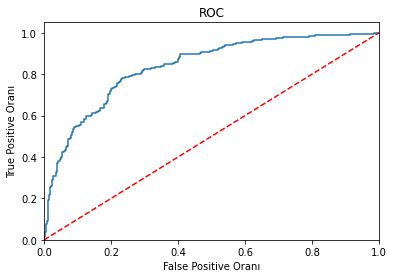

In [29]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc) #false positive rate, true positive rate ve threshold değerleri ile eğri oluşturma
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()



### AUC= ARE UNDER CURVE değerine bakacağız. Eğri altında kalan alana bakarak başarı oranımızı belirliyoruz. Bunu yapmak için test-train ayırma işlemini yapıcaz sonra cross validation ile hatay elde edip diğer modellerle karşılaştırma  yapacağız. Yukardaki hatamız 0.776046666666 idi. Doğurlamak için  baştan model kurup ayırma işlemini yapıyoruz. Aşağıda görüldüğü üzere


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [31]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
accuracy_score(y_test, loj_model.predict(X_test))
#bağımsız değişkenlerin değerlerini al kurmuş olduğum modele bunu sok sonucunda bağımlı değişkenin değerlerini üret. Sınama ile test hatamızı bulduk

0.7532467532467533

In [42]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.7826087 ])

In [33]:
cross_val_score(loj_model, X_ test, y_test, cv = 10).mean() #endoğru sonuç için ortalamayı aldık. ortalama alınmamış hali tek tek değerler olarak yukarıdadır. 
# 1. argüman lojistik regresyon için oluşturulan model, 2. argüman ise model içine yerleştirilmek istenen bağımsız değişken seti, 3. argüman karşılaştırılacak y değerleri

0.7704710144927536

# Gaussian Naive Bayes

#### Fazla kategorik değişkenler olduğu durumlarda ve indirgenemediğimiz zamanlarda kullanılabilir.

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
#öncekilerde test-size 0.25ti burda ve bundan sonrasında artık 0.30 olarak kullanacağız


In [4]:
from sklearn.naive_bayes import GaussianNB #fonksiyonumuzu çağırdık

In [5]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model
#modelimizi oluşturup fit etme işlemini gerçekleştiriyoruz.

GaussianNB()

In [6]:
nb_model.predict(X_test)[0:10] #tahmin işlemimizi gerçekleştirdik. X_test'e göre y değerlerini oluşturduk

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [7]:
nb_model.predict_proba(X_test)[0:10] #olasılık değerlerini gözlemledik

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [8]:
y_pred = nb_model.predict(X_test) #test hatasını incelemek için model oluşturduk

In [9]:
accuracy_score(y_test, y_pred) #test hatamıızı hesapladık

0.7445887445887446

In [10]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() #doğrulanmış test skorumuzu gördük. cross validation işlemi yaptıktan sonra.

0.775

# KNN

## Model & Tahmin

In [11]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
#test train ayrımını yaptık modeli oluşturmaya başladık aşağıda

In [12]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(X_test) #tahmin işlemini gerçekleştirdik

In [14]:
accuracy_score(y_test, y_pred) #doğruluk skorumuza baktık. y_test ve y_pred değerlerini karşılaştırdık

0.6883116883116883

In [15]:
print(classification_report(y_test, y_pred)) #detaylı çıktımızı aldık

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [16]:
knn_params = {"n_neighbors": np.arange(1,50)} #gri search cv modelini yukarda import etmiştik. parametrelerimizi belirliyoruz. komşu sayılarını oluşturduk

In [17]:
#model oluşturdma gridsearch yöntemini uyguluyoruz ve modeli fit ediyoruz.
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [18]:
print("En iyi skor:" + str(knn_cv.best_score_)) #çok önemli bir çıktı değil sadece arad görmek için yazdık. önemli olan best_params'a göre final modelini oluşturduğumuzda çıkan değeri inceleyeceğiz.
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [20]:
knn = KNeighborsClassifier(11) #en iyi değer ile tune edip formulü oluşturduk
knn_tuned = knn.fit(X_train, y_train)

In [21]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [22]:
y_pred = knn_tuned.predict(X_test) #öncekilerde yaptığımız gibi y tahmin değerlerini oluşturup sonrasında accuracy_score ile hesaplaya biliriz.
#ya da knn_tuned.score(X_test,y_test) ile bu işlemi yapabiliriz. Arka planda bizim yaptığımız gibi işlemeye devam ediyor. Önce y_pred edeğeri oluşturup sonrasında score ile hesaplama

In [23]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVM(support vektor machines) veya SVC(supoort vector for classification)

### Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır. 
### Regresyonda ise öyle bir hiper düzlem bulmuştuk ki bu marjinin en az hatayla maximum noktayı bulundurmasını istiyorduk. Burada sınıflandırmada ise yine öyle bir düzlem bulacağız ki içinde en az gözlemi bulundurmasını istiyoruz.

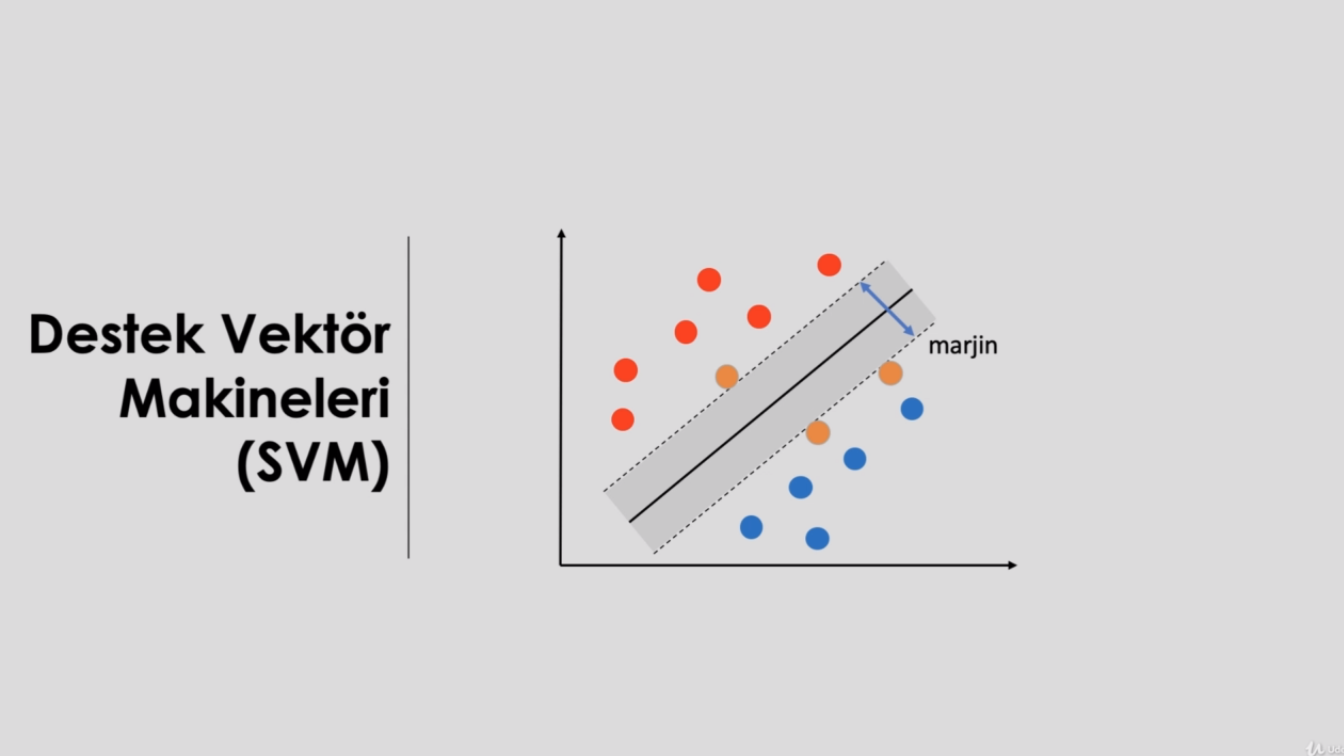

In [43]:
from IPython.display import Image
Image("/home/eren/Masaüstü/Data Science/python_vbo/vbo2/SVM.png")

#sınıfları ayırma işlemi şekil olarak aşağıdadır. Her zaman doğrusal olarak ayırşmayabilir bunları da kernel trick dediğimiz yöntemlerle ayırabiliriz. Çekirdek hilesi.
#boyut arttırma dediğimiz işlem gerçekleştirildikten sonra ayrıştırma işlemleri gerçekleştirilebilir.

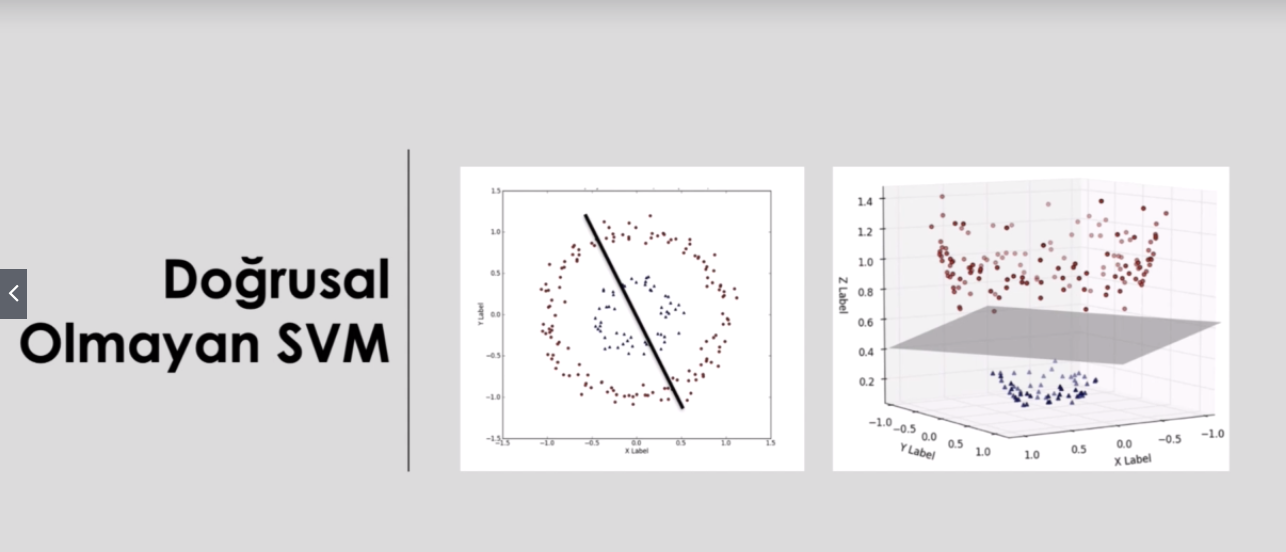

In [40]:
Image("/home/eren/Masaüstü/Data Science/python_vbo/vbo2/svmm.png")

## Model & Tahmin

In [45]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [46]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train) #nesne oluşturma ve fit etme işlemini yapıyoruz. linear.SVC şeklinde de fonksiyon var ekstra olarak

In [47]:
svm_model

SVC(kernel='linear')

In [48]:
y_pred = svm_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred) #1'e yakın oldukça modelimizin başarılı olduğunu biliyoruz. 0-1 aralığında değer alır.

0.7445887445887446

## Model Tuning

### regresyon bölümündeki C hiperparametresi: aykırı gözlemlerin göreceli olan etkilerini kontrol altında tutup oluşacak olan düzlemin oluşmasını kontrole decek imkan sunan parametredir.

In [50]:
svc_params = {"C": np.arange(1,10)} 
#sözlük üzerinden C hiper parametresi değerini tune ederek oluşturulacak olan ayrımın oluşmasını kontrol eden parametreyi düzenlemiş oluyoruz. 0 değerini alamaz 1-10 yaptık

svc = SVC(kernel = "linear") #model nesnemizi oluşturuyoruz gridsearchcv fonkuna ne gönderdiğimiz bilgisini vermiş olalım

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10,     #crossvalidation katman sayımızı belirliyoruz
                            n_jobs = -1, #işlemci performansını arttırıyoruz
                            verbose = 2 ) #çıktıları gözlemliyoruz
#gridsearchimizi yapıyoruz. Izgaramızı oluşturuyoruz
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min


KeyboardInterrupt: 

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train) #final modelini best params ile oluşturuyoruz

In [ ]:
y_pred = svc_tuned.predict(X_test) #tune edilmiş modeli üzerinden y tahmin değerlerini oluşturuyoruz
accuracy_score(y_test, y_pred) #karşılaştırma işlemi yapılıyor. final accuracy score erişmiş olduk

# RBF SVC (Radial Basis Function Support Vector Classification)

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train) #kernel öntanımlı değeri rbf zaaten öncekinde linear atayarak öntanım dışında kullanmış olduk.

In [ ]:
svc_model #dir(svc_model) ile hangi parametreleri gözlemleyebileceğimize bakabiliriz.

In [ ]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

### Regresyon bölümünde gördüğümüz C hiperparametresi: aykırı gözlemlerin göreceli olan etkilerini kontrol altında tutup oluşacak olan düzlemin oluşmasını kontrole decek imkan sunan parametreydi. Burda ise bunun yanında bir de gamma ifadesi var ki etkili parametredir. Gamma'ya dikkat edilmez ön tanımlı olarak kullanılırsa sanki hiç tune işlemi yapılmamış gibi bir dönüş alınır. Aşağıda sözlük parametresi üzerinden bu yapıyı oluşturduk.

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [ ]:
svc = SVC() #model nesnesini oluşturduk.
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Yapay Sinir Ağları

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler  

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled[0:5]

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
mlpc

In [ ]:
?mlpc

In [ ]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

In [ ]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

In [ ]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [ ]:
mlpc_tuned.fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# CART

## Model & Tahmin

In [4]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"] 2 değişkenle yapacak olursak. ve aşağıda X_train ve y_train yerine x ve y girmemiz gerek
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
cart = DecisionTreeClassifier() #DecisionTreeClassifier(max_depth=2)  dersek derinlik sayısı 2 olur daha hızlı ve kısa bi işlem olur örnekleme için
cart_model = cart.fit(X_train, y_train)

In [7]:
cart_model

DecisionTreeClassifier()

In [8]:
#!pip install skompiler
from skompiler import skompile #elde edilen karar yapısının python kodlarına dönüştürülüp başka alanalarda kullanılması için gerekli kütüphane
print(skompile(cart_model.predict).to("python/code")) #CARt modelinin tahmin değerlerini python koda çeviren kod

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[0] <= 4.0 else 0) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (1 if x[1] <= 130.5 else 0) if x[5] <=
    9.649999618530273 else 0 if x[1] <= 133.0 else (1 if x[0] <= 5.0 else 0
    ) if x[2] <= 73.0 else 0) if x[5] <= 26.949999809265137 else (1 if x[1] <=
  

In [9]:
x = [9]

In [10]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1) #sınıf tahmin olarak dönen değer. Gerekli karar ağacının sonunda ortaya çıkan değer

1

In [11]:
y_pred = cart_model.predict(X_test) #ilkel test hatası
accuracy_score(y_test, y_pred)

0.7012987012987013

## Model Tuning

In [12]:
cart_model

DecisionTreeClassifier()

In [13]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, th

In [14]:
cart_grid = {"max_depth": range(1,10), #derinlik miktarı burda range ile yaptık aşağıda liste olarak yaptık bi fark yok
            "min_samples_split" : list(range(2,50)) } #bölünme için gerekli olan minimum örnek sayısı.  min_samples_leaf ise en son node(düğüm) ikisinin karıştırma

In [15]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 2524 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   27.4s finished


In [16]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [17]:
#final

In [18]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19) #best paramsa göre final modelini kurduk
cart_tuned = cart.fit(X_train, y_train)

In [19]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [20]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [23]:
rf_model

RandomForestClassifier()

In [24]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [25]:
rf_model

RandomForestClassifier()

In [27]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for t

In [28]:
rf_params = {"max_depth": [2,5,8,10], #maksimim derinlik dallanma miktarı overfitting'in önüne geçmek için
            "max_features": [2,5,8], #göz önünde bulundurulacak değişken sayısı
            "n_estimators": [10,500,1000], #kullanılacak olan ağaç sayısı ideali 500-1000 genelde default 10
            "min_samples_split": [2,5,10]} # düğüm noktasında bölünme işlemine karar veren 

In [29]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, #grid search yaptık 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [30]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.8min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [31]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_)) #en iyi parametreleri bulduk max_depth 8 çıktı yani her bölünmede bütün değişkenleri göz önünde bulundur

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 10}


In [32]:
#final

In [33]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [34]:
y_pred = rf_tuned.predict(X_test)  3ilkel hata
accuracy_score(y_test, y_pred)

0.7532467532467533

## Değişken önemlerinin değerlendirilmesi

In [35]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

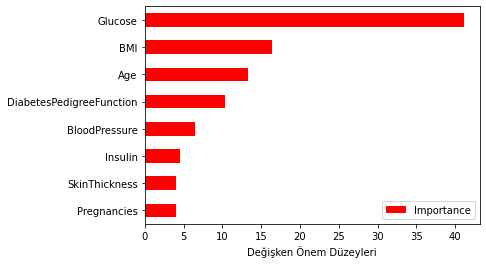

In [36]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [37]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [40]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [41]:
gbm_model

GradientBoostingClassifier()

In [42]:
?gbm_model #değişkenlerinden alınacak gözlem sayısı subsample. fazla gözlemimiz olsaydı değerlendirecektik aşağıda

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    learning rate shr

In [43]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05], 
             "n_estimators": [100,500,100], #ağaç sayısı
             "max_depth": [3,5,10], #öğrenme derinliği
             "min_samples_split": [2,5,10]} 

In [44]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [45]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [46]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [48]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [49]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

In [50]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [51]:
#!pip install xgboost
from xgboost import XGBClassifier

In [52]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[22:00:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [55]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        ~/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or

In [57]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [58]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [59]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 19.5min


KeyboardInterrupt: 

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# LightGBM

In [60]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [61]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [62]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [63]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [64]:
## Model Tuning

In [65]:
lgbm_model

LGBMClassifier()

In [66]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           ~/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (def

In [67]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]} 

In [68]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [69]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1041 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2217 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2824 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3581 tasks      | elapsed:  9.0min


KeyboardInterrupt: 

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) #normalde diğer kesinlik değerleri f score'ları vs değerlendirilebilir. kısa olsun diye burda böyle bakıyoruz. statsmodel.summary() 'den gelen değerler.'

### XGBM'den süre olarak neredeyse yarı yarıya daha iyi. Daha fazla parametreli veriler için kullanılması daha mantıklı

# CatBoost

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Tüm Modellerin Karşılaştırılması

In [70]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test) #gelen değişkenleri bütün modellere gönderir
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

NameError: name 'knn_tuned' is not defined

In [ ]:
#görselleştirme
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    